In [ ]:
#https://github.com/deepcharles/ruptures
#https://centre-borelli.github.io/ruptures-docs/code-reference/detection/kernelcpd-reference/#ruptures.detection.kernelcpd.KernelCPD

In [1]:
import import_ipynb
import matplotlib.pyplot as plt  # To visualize
import ruptures as rpt

from BabiloniaDataAnalytics import BabiloniaDataAnalytics
bda = BabiloniaDataAnalytics('../../server/app/config.json')

importing Jupyter notebook from BabiloniaDataAnalytics.ipynb


In [2]:
bda.plot_node_moisture()
# Range: 1608951601 – 1609037999 / MUX2 => level shift

In [39]:
signal = bda.NODE_MOISTURE_DATA[(bda.NODE_MOISTURE_DATA.index > 1608919165) & (bda.NODE_MOISTURE_DATA.index < 1609037999)].rolling(120).mean().dropna() # 120 ~ 1 hour
signal.reset_index(level=0, inplace=True)

In [41]:
X = signal.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

2956


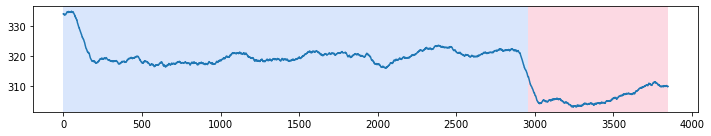

2969


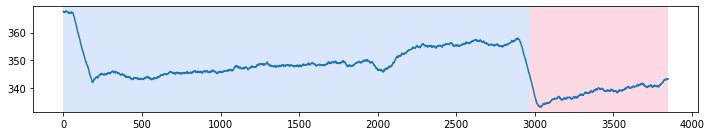

2975


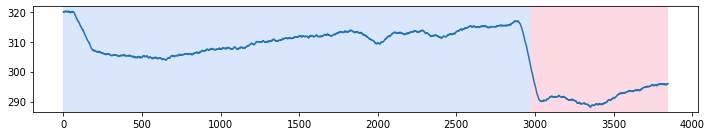

2990


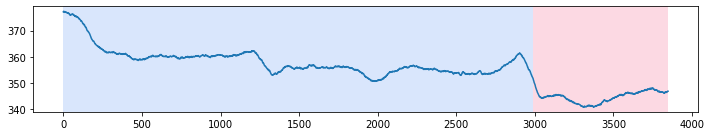

2965


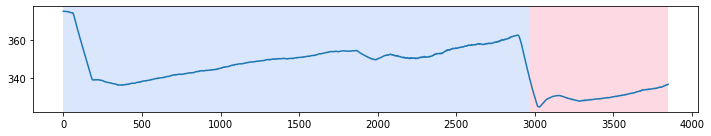

2959


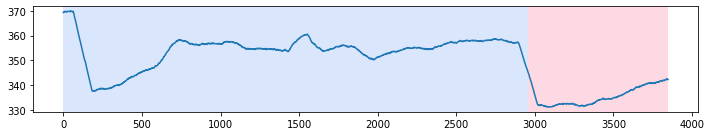

In [44]:
for i in range(1,7):
    Y = signal.iloc[:, i].values.reshape(-1, 1) 
    #https://centre-borelli.github.io/ruptures-docs/code-reference/detection/kernelcpd-reference/#ruptures.detection.kernelcpd.KernelCPD
    pelt = rpt.KernelCPD(kernel="linear", min_size=120).fit_predict(Y, n_bkps=1)  # written in C, same class as before
    # display
    rpt.display(Y, pelt)
    print(pelt[0])
    plt.show()